### 7.	연령대별 혼인상태는 어떤가?(사별, 혼인, 이혼등) --> 연령대, 혼인상태

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from matplotlib import rc

In [4]:
df=pd.read_excel('./data/survey15.xlsx')
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
0,201,2,1945,2,NaN,NaN,NaN,NaN,5.0,NaN
1,301,1,1948,2,942.0,167.0,NaN,NaN,5.0,NaN
2,401,1,1942,3,762.0,78.0,NaN,NaN,5.0,NaN
3,601,1,1962,1,532.0,NaN,NaN,NaN,5.0,NaN
4,602,2,1963,1,NaN,NaN,NaN,12.0,5.0,NaN


- 연령대 변수 검토

In [5]:
df['birth_years'].describe()

count    13460.000000
mean      1969.469316
std         24.393833
min       1907.000000
25%       1948.000000
50%       1967.000000
75%       1990.000000
max       2019.000000
Name: birth_years, dtype: float64

In [6]:
df['birth_years'].isnull().sum()

0

'>>연령대 변수는 1907년생 ~ 2019년생 총 103가지 종류, 결측치 없음

In [7]:
# 나이를 계산해서 'old'에 넣어주자
df['old'] = [2021 - y + 1 for y in df['birth_years']]
df[['birth_years', 'old']]

,birth_years,old
0,1945,77
1,1948,74
2,1942,80
3,1962,60
4,1963,59
...,...,...
13455,1967,55
13456,1992,30
13457,1995,27
13458,1998,24


- 혼인상태 변수 검토

In [8]:
df['married'].describe()

count    13460.000000
mean         1.792273
std          1.617278
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: married, dtype: float64

In [9]:
df['married'].isnull().sum()

0

'>> 혼인상태 변수는 0~6으로 구분, 결측치 없음 <br>
    0: 비해당(18세 미만), 1:배우자 있음, 2:사별, 3: 이혼, 4:별거, 5:미혼(18세 이상, 미혼모 포함), 6:기타(사망 등)

In [10]:
#0~6값을 알기 쉽게 한국어로 바꾸자
df['married'] = df['married'].map({0:'해당없음', 1:'배우자있음', 
    2:'사별', 3:'이혼', 4:'별거', 5:'미혼', 6:'기타'}, na_action=None)
df['married']

0           사별
1           사별
2           이혼
3        배우자있음
4        배우자있음
         ...  
13455    배우자있음
13456       미혼
13457       미혼
13458       미혼
13459       미혼
Name: married, Length: 13460, dtype: object

In [11]:
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq,old
0,201,2,1945,사별,NaN,NaN,NaN,NaN,5.0,NaN,77
1,301,1,1948,사별,942.0,167.0,NaN,NaN,5.0,NaN,74
2,401,1,1942,이혼,762.0,78.0,NaN,NaN,5.0,NaN,80
3,601,1,1962,배우자있음,532.0,NaN,NaN,NaN,5.0,NaN,60
4,602,2,1963,배우자있음,NaN,NaN,NaN,12.0,5.0,NaN,59


- 연령대 별로 자르기

In [12]:
df['old'].describe()

count    13460.000000
mean        52.530684
std         24.393833
min          3.000000
25%         32.000000
50%         55.000000
75%         74.000000
max        115.000000
Name: old, dtype: float64

In [13]:
#구간정의 (0~120을 10단위 씩)
bins=list(range(0, 121, 10))

# 레이블 정의 (0대, 10대, 20대, ...)
bins_labels = [ str(x)+"대" for x in bins[:-1]]

#df에 age_bin 추가
df['old_bin']=pd.cut(df['old'], bins, right=False, labels=bins_labels)
df[['old', 'old_bin']]

,old,old_bin
0,77,70대
1,74,70대
2,80,80대
3,60,60대
4,59,50대
...,...,...
13455,55,50대
13456,30,30대
13457,27,20대
13458,24,20대


- 그래프 그리기

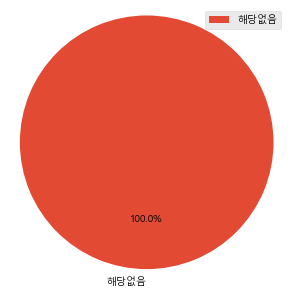

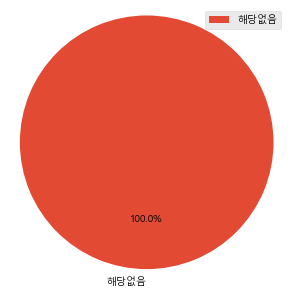

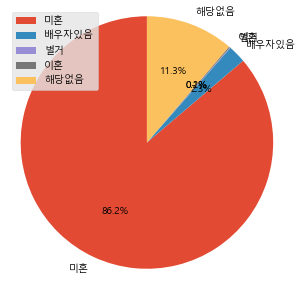

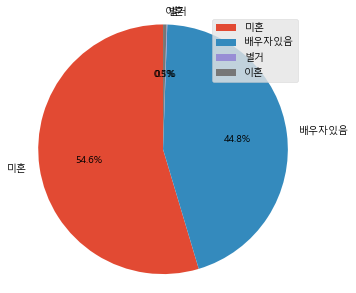

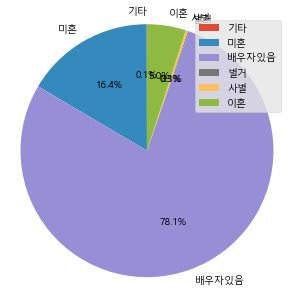

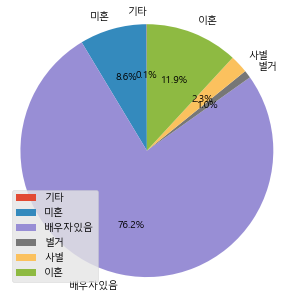

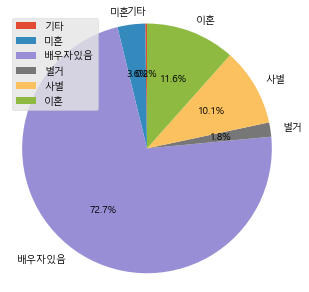

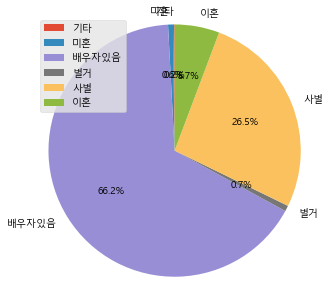

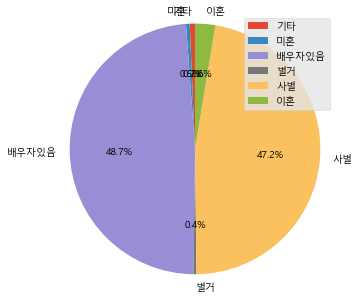

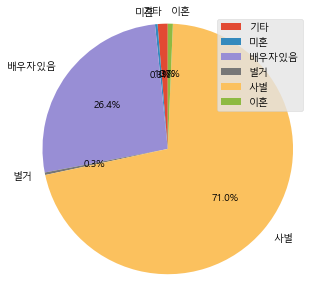

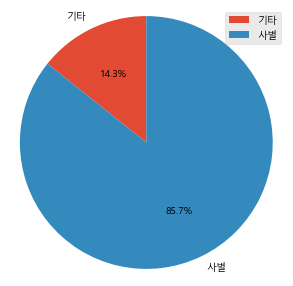

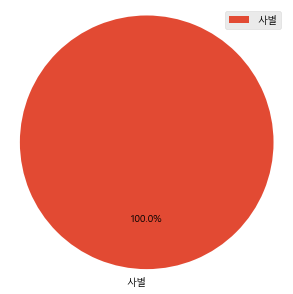

In [14]:
for ages in bins_labels :
    con = df['old_bin'] == ages
    df2 = df[con]
    df3=df2.groupby('married').count()
    marry_list = df3['pannel_id'].tolist()
    label_list = df3.index.tolist()
    
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    fig = plt.figure(figsize=(5,5))

    plt.pie(marry_list, labels=label_list, autopct='%.1f%%', startangle=90)
    plt.axis('equal')
    plt.legend()

    plt.show

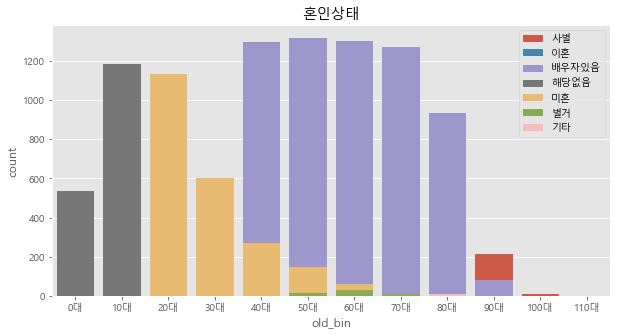

In [15]:
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(10,5))

fig = sns.countplot(x="old_bin", hue='married',dodge=False, data=df)

plt.title("혼인상태")
plt.legend(loc=1)
plt.show()